# Finding the number of dimensions in a dataset

A larger sample of the Pokemon dataset has been loaded for you as the pandas DataFrame `pokemon_df`.

How many dimensions, or columns are in this dataset?

In [1]:
import pandas as pd
pokemon_df = pd.read_csv("dataset/pokemon.csv")
pokemon_df.shape

(800, 13)

# Removing features without variance

A sample of the Pokemon dataset has been loaded as `pokemon_df`. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.


In [2]:
print(pokemon_df.columns)
pokemon_df = pokemon_df[pokemon_df["Generation"]==1]
pokemon_df.describe()

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0
mean,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,1.0
std,45.153246,115.878076,28.153968,30.744727,28.641336,34.439106,25.505275,29.675857,0.0
min,1.000000,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,36.250000,325.000000,46.500000,55.000000,50.000000,45.000000,50.000000,50.000000,1.0
50%,76.500000,436.500000,62.000000,75.000000,66.000000,65.000000,70.000000,70.000000,1.0
75%,115.000000,500.000000,80.000000,95.000000,85.000000,95.000000,85.000000,92.250000,1.0
max,151.000000,780.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,1.0


- We will drop "Generation" column

In [3]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1', 'Legendary']

pokemon_df[number_cols].describe()

,HP,Attack,Defense
count,166.000000,166.000000,166.000000
mean,65.819277,76.638554,70.861446
std,28.153968,30.744727,28.641336
min,10.000000,5.000000,5.000000
25%,46.500000,55.000000,50.000000
50%,62.000000,75.000000,66.000000
75%,80.000000,95.000000,85.000000
max,250.000000,190.000000,180.000000


In [4]:
pokemon_df[non_number_cols].describe()

,Name,Type 1,Legendary
count,166,166,166
unique,166,15,2
top,Bulbasaur,Water,False
freq,1,31,160


- We will drop  "Legendary" column

In [5]:
non_number_cols = ['Name', 'Type 1']
# Create a new DataFrame by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


# Visually detecting redundant features

Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

ansur_df_1 = pd.read_csv("dataset/ANSUR_II_MALE.csv")
ansur_df_2 = pd.read_csv("dataset/ANSUR_II_FEMALE.csv")
selected_cols = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',"stature_m","weight_kg","footlength"]
ansur_df_1 = ansur_df_1[selected_cols]
ansur_df_2 = ansur_df_2[selected_cols]
print(ansur_df_1.columns)
print(ansur_df_2.columns)

Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')
Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')


In [53]:
ansur_df = pd.concat([ansur_df_1,ansur_df_2],axis=0,ignore_index=True)
ansur_df.head()

,BMI_class,Height_class,Gender,Component,Branch,stature_m,weight_kg,footlength
0,Overweight,Tall,Male,Regular Army,Combat Arms,1.776,81.5,273
1,Overweight,Normal,Male,Regular Army,Combat Support,1.702,72.6,263
2,Overweight,Normal,Male,Regular Army,Combat Support,1.735,92.9,270
3,Overweight,Normal,Male,Regular Army,Combat Service Support,1.655,79.4,267
4,Overweight,Tall,Male,Regular Army,Combat Service Support,1.914,94.6,305


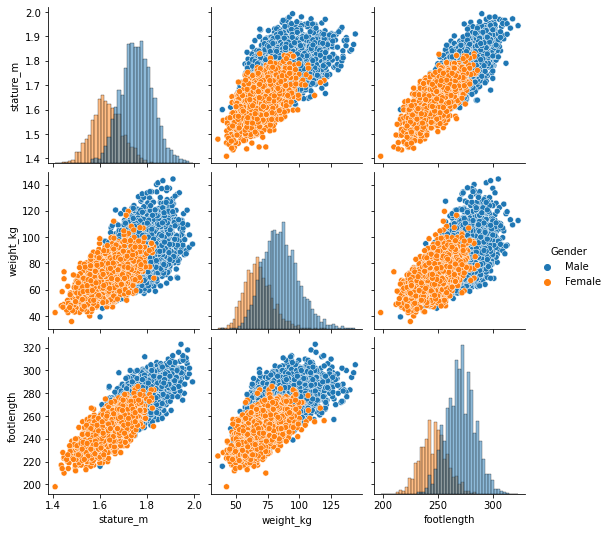

In [54]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df, hue="Gender", diag_kind='hist')
# Show the plot
plt.show()

In [55]:
print(ansur_df.columns)
# Remove one of the redundant features
reduced_df = ansur_df.drop("stature_m", axis=1)
print(reduced_df.columns)

Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')
Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'weight_kg', 'footlength'],
      dtype='object')


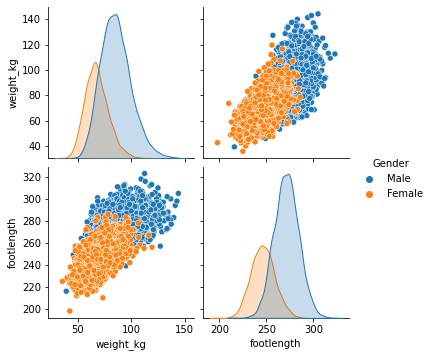

In [56]:

selected_cols = ['weight_kg', 'footlength']
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(data = reduced_df, vars=selected_cols, hue='Gender')

# Show the plot
plt.show()

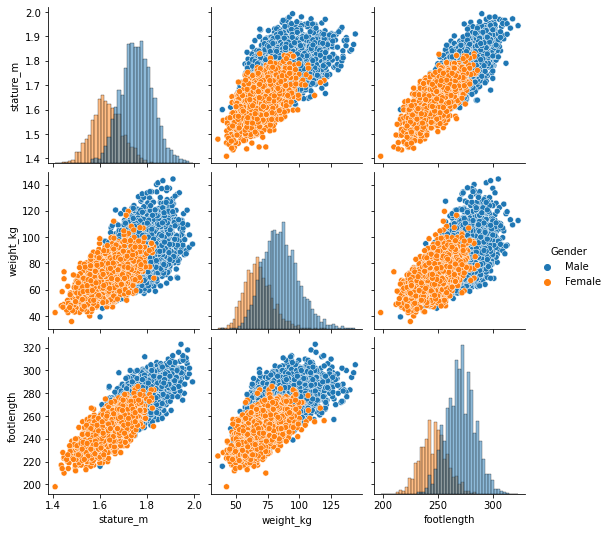

In [57]:

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df, hue="Gender", diag_kind='hist')

# Show the plot
plt.show()

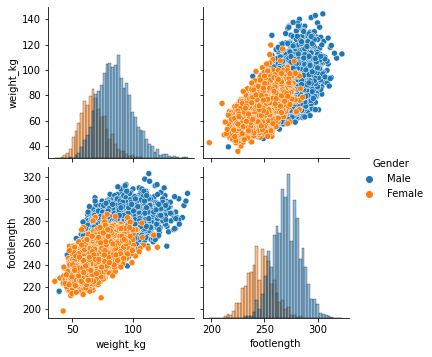

In [58]:
# Remove the redundant feature
# reduced_df = ansur_df.drop("n_legs",axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# Advantage of feature selection

What advantage does feature selection have over feature extraction?

- The selected features remain unchanged, and are therefore easier to interpret.

# t-SNE intuition

t-SNE is super powerful, but do you know exactly when to use it?

What is a good use case to use t-SNE?

- When you want to visually explore the patterns in a high dimensional dataset.

# Fitting t-SNE to the ANSUR data

t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset `df` and fit `TSNE` to this numeric dataset.

In [61]:
ansur_df.columns

Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')

In [62]:
from sklearn.manifold import TSNE
df = ansur_df
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component','BMI_class', 'Height_class']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


# t-SNE visualisation of dimensionality

Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('`x`' and '`y`') which were added to the dataset df

In [63]:
df["x"] = tsne_features[:,0]
df["y"] = tsne_features[:,1]

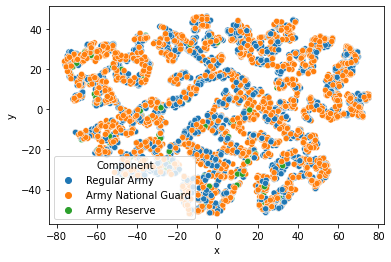

In [64]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

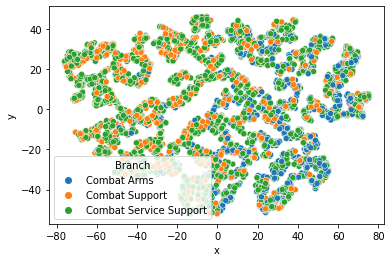

In [65]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

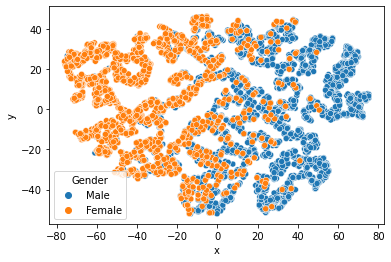

In [66]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()